In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

In [8]:
%matplotlib inline
from matplotlib import style
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## 분석

In [9]:
plt.rcParams['font.family'] = 'NanumGothic'

In [10]:
df = pd.read_csv('data/unmatch_data1.csv',encoding='euc-kr').drop(columns=['Unnamed: 0'])

In [23]:
cond = ((df.location == '제천') | (df.location == '고산') | (df.location == '순천') | (df.location == '양평') | (df.location == '구미') | (df.location == '보은')\
        | (df.location == '대관령') | (df.location == '금산') | (df.location == '봉화') | (df.location == '영주') | (df.location == '북춘천') | (df.location == '홍천'))\
        & (df.month == 9)

df[cond].location.value_counts()

구미     23
보은     19
양평     17
금산     17
홍천     16
봉화     16
제천     14
영주     14
고산     12
북춘천     5
대관령     4
순천      4
Name: location, dtype: int64

In [24]:
lo = ['제천','고산','순천','양평','구미','보은', '대관령' , '금산','봉화','영주','북춘천','홍천']
lo_count = [14,12,4,17,23,19,4,17,16,14,5,16]

In [2]:
r2_sco, sqrt = [],[]

for i in range(len(lo)):
    cond = (df.month == 9) & (df.location == f'{lo[i]}')
    # 서울, 속초,보은,대전,전주,대구,목포,부산

    test = df[cond].drop(columns=['wind'])

    LR = LinearRegression()
    

    X = test.iloc[:,[6]]
    y = test.iloc[:,[13]]

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # LR.fit(X_train,y_train)

    # pred = LR.predict(X_test)
    
    # # r2_sco.append(r2_score(pred, y_test))
    # sqrt.append(np.sqrt(mean_squared_error(pred, y_test)))
    LR.fit(X,y)
    r2_sco.append(LR.score(X,y))

    # print(LR.coef_,LR.intercept_)
    # print(r2_score(pred, y_test),np.sqrt(mean_squared_error(pred, y_test)))
dc = pd.DataFrame({'location':lo,'r2_sco':r2_sco,'lo_count':lo_count})
dc

NameError: name 'lo' is not defined

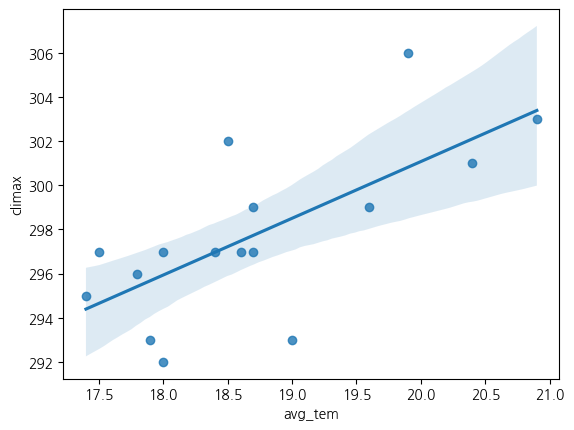

In [41]:
cond = (df.month == 9) & (df.location == '홍천')

test = df[cond].drop(columns=['wind']).iloc[:,[6,13]]
sns.regplot(data=test, x='avg_tem', y='climax')
plt.show()

In [13]:
df[df.month == 9].location.value_counts()[:10]

인천    33
전주    32
대전    32
안동    32
창원    32
포항    32
목포    31
울산    31
청주    31
서울    31
Name: location, dtype: int64

In [27]:
cond = ((df.location == '인천') | (df.location == '전주') | (df.location == '대전') | (df.location == '안동') | (df.location == '창원') \
        | (df.location == '포항') | (df.location == '목포') | (df.location == '울산') | (df.location == '청주')  | (df.location == '서울'))\
        & (df.month == 9)

# df[cond].location.value_counts()

In [28]:
lo = ['인천','전주','대전','안동','창원','포항', '목포' , '울산','청주','서울']
lo_count = [33,32,32,32,32,32,31,31,31,31]

In [29]:
r2_sco, sqrt = [],[]

for i in range(len(lo)):
    cond = (df.month == 9) & (df.location == f'{lo[i]}')
    # 서울, 속초,보은,대전,전주,대구,목포,부산

    test = df[cond].drop(columns=['wind'])

    LR = LinearRegression()


    X = test.iloc[:,[6]]
    y = test.iloc[:,[13]]

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # LR.fit(X_train,y_train)

    # pred = LR.predict(X_test)
    
    # # r2_sco.append(r2_score(pred, y_test))
    # sqrt.append(np.sqrt(mean_squared_error(pred, y_test)))
    LR.fit(X,y)
    r2_sco.append(LR.score(X,y))

    # print(LR.coef_,LR.intercept_)
    # print(r2_score(pred, y_test),np.sqrt(mean_squared_error(pred, y_test)))
dc = pd.DataFrame({'location':lo,'r2_sco':r2_sco,'lo_count':lo_count})
dc

,location,r2_sco,lo_count
0,인천,0.014854,33
1,전주,0.101680,32
2,대전,0.041668,32
3,안동,0.030549,32
4,창원,0.163544,32
5,포항,0.060789,32
6,목포,0.001977,31
7,울산,0.000324,31
8,청주,0.155249,31
9,서울,0.051322,31


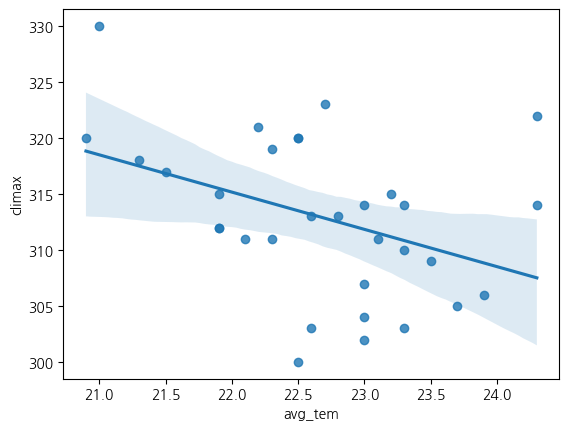

In [42]:
cond = (df.month == 9) & (df.location == '창원')

test = df[cond].drop(columns=['wind']).iloc[:,[6,13]]
sns.regplot(data=test, x='avg_tem', y='climax')
plt.show()

In [156]:
lo = ['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '제천', '보은',
       '천안', '보령', '부여', '금산', '부안', '임실', '정읍', '남원', '장수', '고창군', '장흥',
       '해남', '고흥', '봉화', '영주', '문경', '영덕', '의성', '구미', '영천', '거창', '합천',
       '밀양', '산청', '거제', '남해']

# lo = ['속초', '북춘천', '철원', '동두천']

In [157]:
result = pd.DataFrame({'location':lo})

In [158]:
for j in range(len(lo)):
    error = []

    for i in range(len(lo)):
        cond1 = (df.month == 9) & (df.location == f'{lo[j]}')
        cond2 = (df.month == 9) & (df.location == f'{lo[i]}')

        train = df[cond1].drop(columns=['wind'])
        test = df[cond2].drop(columns=['wind'])

        LR = LinearRegression()


        X = train.iloc[:,[6]]
        y = train.iloc[:,[13]]

        X_test = test.iloc[:,[6]]
        y_test = test.iloc[:,[13]] 


        LR.fit(X,y)

        pred = LR.predict(X_test)

        # result = pd.DataFrame({'year':test.year,'climax':test.climax,'pred':pred.reshape(1,-1)[0]})
        error.append(np.sqrt(mean_squared_error(pred, y_test)))
        # print(np.sqrt(mean_squared_error(pred, y_test)))
    result[f'{lo[j]}'] = error

In [160]:
result.to_csv('Linear/linear_result.csv',encoding='cp949',index=False)

In [180]:
cond = (result.location == '구미')

result[cond]

,location,속초,북춘천,철원,동두천,파주,대관령,춘천,백령도,북강릉,...,영덕,의성,구미,영천,거창,합천,밀양,산청,거제,남해
72,구미,5.76,5.52,10.31,5.83,6.07,22.84,5.54,8.68,7.99,...,6.92,6.02,5.31,5.61,8.47,5.38,6.40,6.88,19.85,20.18


5.394807195909233


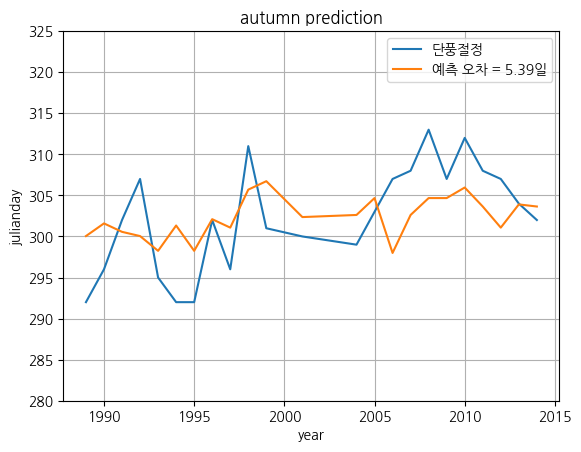

In [121]:
# cond1 = (df.month == 9) & (df.location == '홍천')
# cond2 = (df.month == 9) & (df.location == '구미')

# train = df[cond1].drop(columns=['wind'])
# test = df[cond2].drop(columns=['wind'])

# LR = LinearRegression()


# X = train.iloc[:,[6]]
# y = train.iloc[:,[13]]

# X_test = test.iloc[:,[6]]
# y_test = test.iloc[:,[13]] 


# LR.fit(X,y)

# pred = LR.predict(X_test)

# result = pd.DataFrame({'year':test.year,'climax':test.climax,'pred':pred.reshape(1,-1)[0]})
# print(np.sqrt(mean_squared_error(pred, y_test)))

# plt.plot(result.year,result.climax,label='단풍절정')
# plt.plot(result.year,result.pred,label=f'예측 오차 = {round(np.sqrt(mean_squared_error(pred, y_test)),2)}일')
# plt.title('autumn prediction')
# plt.ylabel('julianday')
# plt.xlabel('year')
# plt.legend()
# plt.grid()
# plt.ylim(280,325)
# plt.show()

## RFL

In [142]:
error = []

for i in range(len(lo)):
    cond1 = (df.month == 9) & (df.location == '홍천')
    cond2 = (df.month == 9) & (df.location == f'{lo[i]}')

    train = df[cond1].drop(columns=['wind'])
    test = df[cond2].drop(columns=['wind'])

    RF = KNeighborsRegressor()

    X = train.iloc[:,[6]]
    y = train.iloc[:,[13]]

    X_test = test.iloc[:,[6]]
    y_test = test.iloc[:,[13]] 


    RF.fit(X,y)

    pred = RF.predict(X_test)

    # result = pd.DataFrame({'year':test.year,'climax':test.climax,'pred':pred.reshape(1,-1)[0]})
    error.append(np.sqrt(mean_squared_error(pred, y_test)))
    # print(np.sqrt(mean_squared_error(pred, y_test)))
result = pd.DataFrame({'location':lo,'error':error})

In [143]:
result.mean()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20096\2046019998.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.mean()


error   10.07
dtype: float64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20096\1913821123.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  LR.fit(X,y)


6.044222081463275


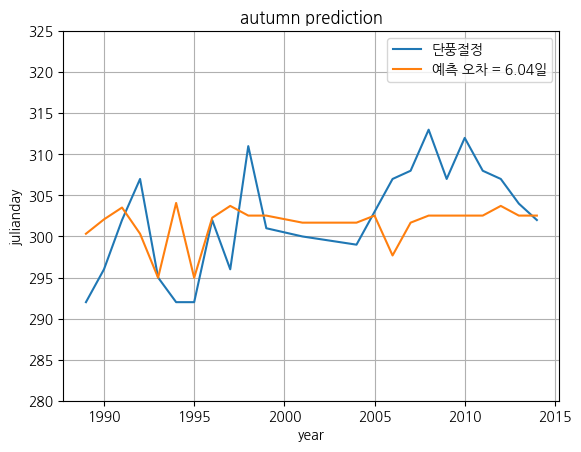

In [151]:
cond1 = (df.month == 9) & (df.location == '홍천')
cond2 = (df.month == 9) & (df.location == '구미')

train = df[cond1].drop(columns=['wind'])
test = df[cond2].drop(columns=['wind'])

LR = RandomForestRegressor()
# DecisionTreeRegressor KNeighborsRegressor

X = train.iloc[:,[6]]
y = train.iloc[:,[13]]

X_test = test.iloc[:,[6]]
y_test = test.iloc[:,[13]] 


LR.fit(X,y)

pred = LR.predict(X_test)

result = pd.DataFrame({'year':test.year,'climax':test.climax,'pred':pred.reshape(1,-1)[0]})
print(np.sqrt(mean_squared_error(pred, y_test)))

plt.plot(result.year,result.climax,label='단풍절정')
plt.plot(result.year,result.pred,label=f'예측 오차 = {round(np.sqrt(mean_squared_error(pred, y_test)),2)}일')
plt.title('autumn prediction')
plt.ylabel('julianday')
plt.xlabel('year')
plt.legend()
plt.grid()
plt.ylim(280,325)
plt.show()